In [2]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from matplotlib.pyplot import figure

In [3]:
df = pd.read_csv('Position_CSV/QB_dat.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Derek Anderson,22,78,4.512821,NaN,6.8,NaN,768.0,NaN,NaN,...,8.0,NaN,NaN,-533.0,-2.9,NaN,NaN,NaN,NaN,Career
1,Charlie Batch,37,81,7.308642,NaN,7.3,NaN,579.0,NaN,NaN,...,5.0,NaN,NaN,123.0,0.7,NaN,NaN,NaN,NaN,Career
2,Brooks Bollinger,6,21,4.571429,NaN,7.3,NaN,414.0,NaN,NaN,...,26.0,NaN,NaN,1817.0,3.5,NaN,NaN,NaN,NaN,Career
3,Kyle Boller,18,67,4.298507,NaN,5.5,NaN,622.0,NaN,NaN,...,7.0,NaN,NaN,-130.0,-0.5,NaN,NaN,NaN,NaN,Career
4,Blake Bortles,48,78,9.846154,Career,8.8,0.0,585.0,0.0,0.0,...,15.0,NaN,230.0,558.0,2.8,NaN,0.0,NaN,NaN,NaN


In [4]:
df.drop(['name', 'approximate_value', 'games.x', 'games.y', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'weight', 'year', 'X'], axis=1, inplace=True)

In [5]:
df.fillna(0, inplace=True)

In [6]:
for col in df.columns: 
    print(col) 

AVp16
adjusted_yards_per_attempt
assists_on_tackles
completed_passes
extra_points_made
field_goals_made
fumbles_forced
fumbles_recovered
fumbles_recovered_for_touchdown
interceptions
interceptions_returned_for_touchdown
interceptions_thrown
kickoff_return_touchdowns
other_touchdowns
pass_attempts
passes_defended
passing_completion
passing_touchdowns
passing_yards
passing_yards_per_attempt
plays_from_scrimmage
points
punt_return_touchdowns
quarterback_rating
receiving_touchdowns
receiving_yards
receiving_yards_per_reception
receptions
rush_attempts
rush_touchdowns
rush_yards
rush_yards_per_attempt
rushing_and_receiving_touchdowns
sacks
safeties
solo_tackles
tackles_for_loss
total_tackles
total_touchdowns
two_point_conversions
yards_from_scrimmage
yards_from_scrimmage_per_play
yards_recovered_from_fumble
yards_returned_from_interceptions
yards_returned_per_interception


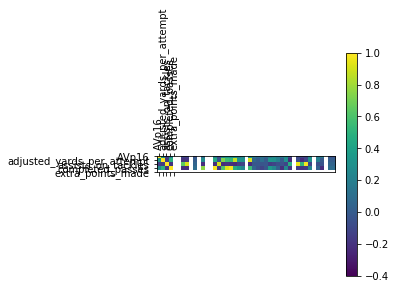

In [7]:
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['adjusted_yards_per_attempt', 'completed_passes', 'interceptions_thrown', 'other_touchdowns', 'pass_attempts', 'passing_completion', 'passing_touchdowns', 'passing_yards', 'passing_yards_per_attempt', 'plays_from_scrimmage', 'points', 'quarterback_rating', 'receiving_yards_per_reception', 'receptions', 'rush_attempts', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.005138108684162868
Weights:  [ 2.34505416e-01 -2.71562939e-02  1.58261189e-02 -8.31626434e-15
  1.14923168e-03  6.05976427e-02 -4.19970584e-02  2.73896974e-03
 -1.91233498e+00 -6.38172283e-02  1.03371289e-01  8.35297937e-02
  7.00412066e-02 -1.06342002e-01  4.25247734e-02 -5.08509689e-01
 -1.73818484e-02  2.99532472e+00  1.72285482e-02  0.00000000e+00
  1.80015022e-02 -2.63635272e+00]


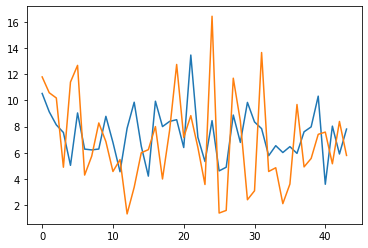

In [9]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['other_touchdowns', 'pass_attempts', 'passing_yards']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.09136030855361266
Weights:  [ 0.         -0.01159559  0.00175498]


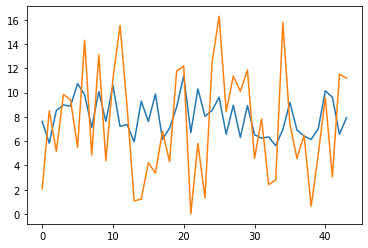

In [11]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.09136032696318508
Weights:  [ 0.         -0.01159558  0.00175498]


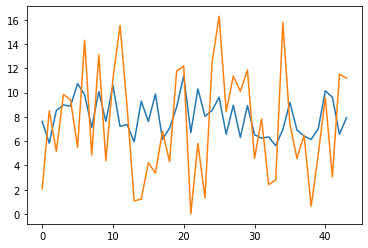

In [12]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [13]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
0.06442037703168908
[ 0.         -0.0108705   0.00167241]

Ridge Regression
0.06573859455799609
[ 0.         -0.01072014  0.00165611]
